In [1]:
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
# for Palatino and other serif fonts use:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})
# It's also possible to use the reduced notation by directly setting font.family:
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "Helvetica"
})

## The Lorenz attractor

     In 1963, Edward Lorenz developed a simple mathematical model of the way air moves around in the atmosphere.
     His model was a system of three ordinary differential equations that demonstrate deterministic chaos at certain   
     parameter values and initial conditions. The Lorenz attractor is the system's strange attractor that resembles
     a butterfly when visualized. The Lorenz system is nonlinear, three-dimensional, and deterministic.                   
     The Lorenz attractor is a set of chaotic solutions of the Lorenz system and is the most famous depiction 
     of a system that exibits chaotic behavior. Very slight changes to the initial conditions of the system lead 
     to wildly different solutions. The system itself describes the movement of a point in a 3D space over time. 
    The system is described by three ordinary differential equations that represent the movement of this point (x, y, z).       In these equations, t represents time and sigma, rho, and beta are constant system parameters.

$$\displaystyle{ \frac{dx}{dt} = \sigma(y-x) \\
                 \frac{dy}{dt} = x(\rho-z)-y \\ 
                 \frac{dz}{dt} = xy-{\beta z}}$$ 

For his famous depiction of chaos, 
Lorenz used the values $\displaystyle{\sigma = 10, \beta = \frac{8}{3}, \rho = 28}$.

With these parameter values, the system exhibits deterministic chaos. It has a strange attractor with a fractal structure.

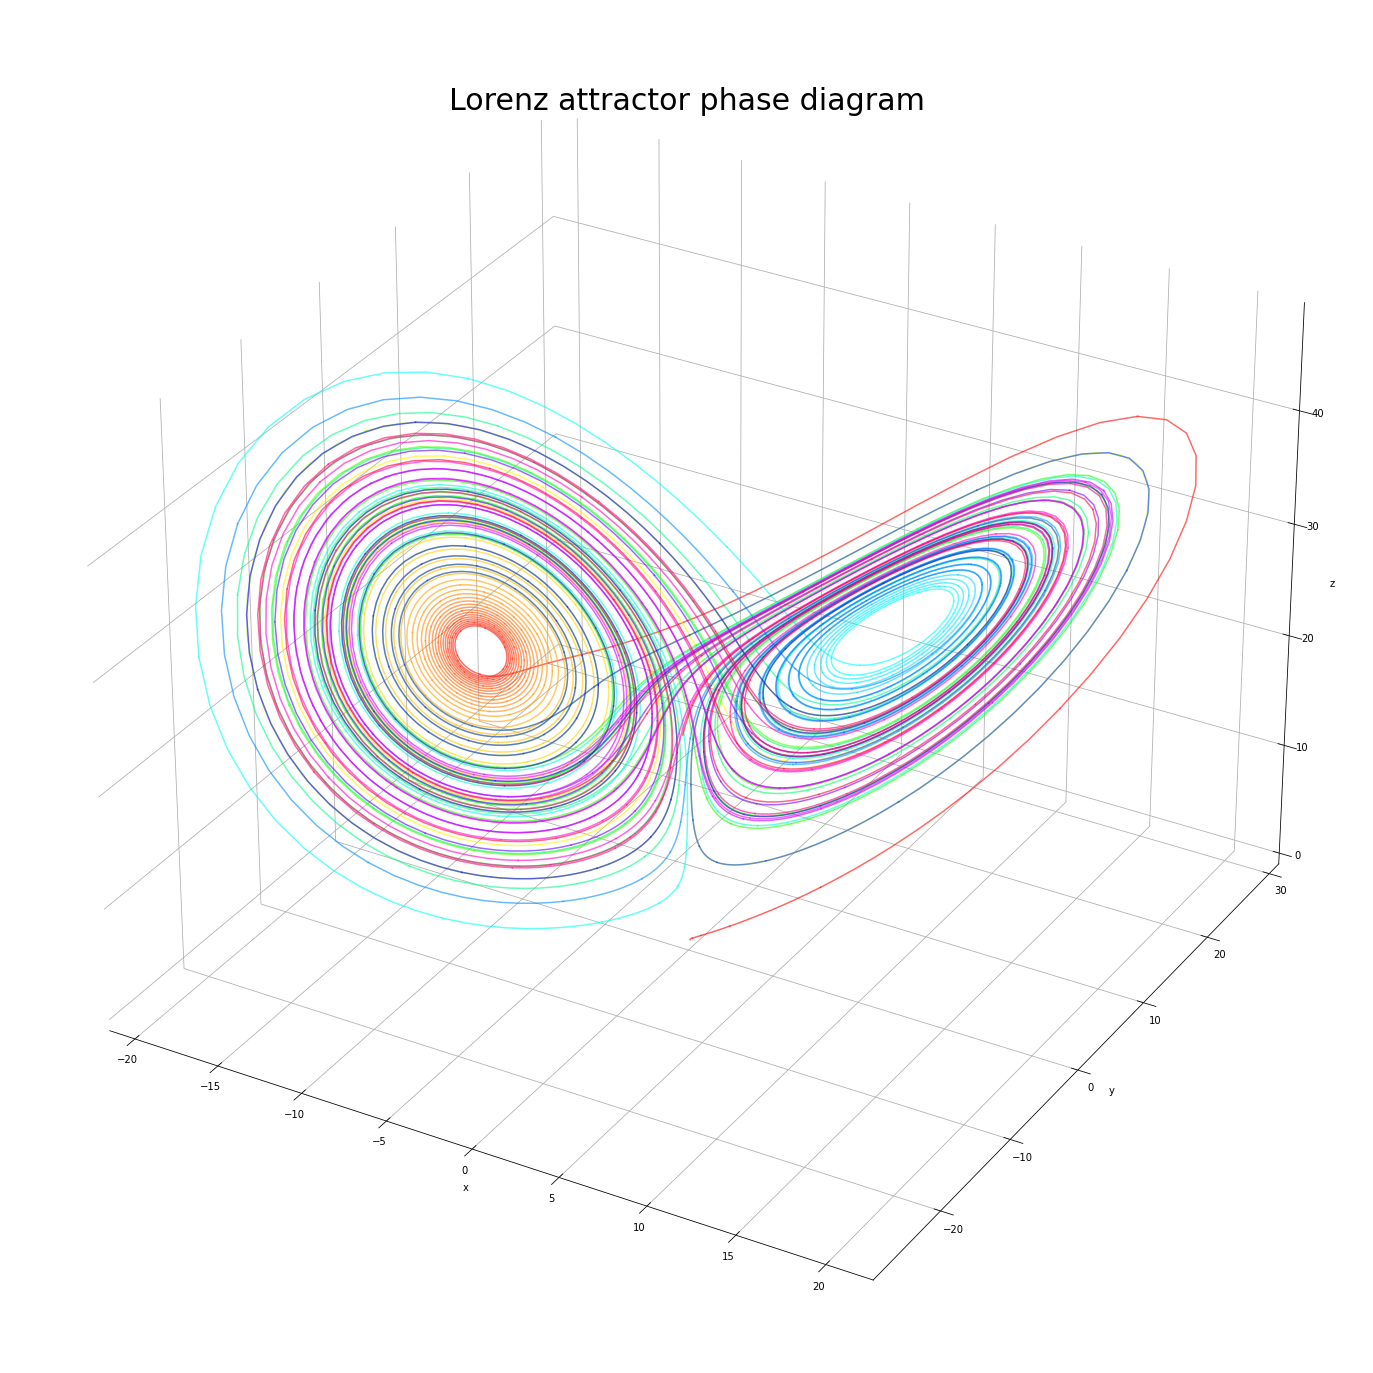

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d.axes3d import Axes3D

initial_state = [0.1, 0, 0] # the initial system state ( x, y, z positions in space)

sigma = 10.
rho   = 28.
beta  = 8./3.

start_time = 0
end_time = 100
time_points = np.linspace(start_time, end_time, end_time*100)

def lorenz_system(current_state, t):  # t is time
    x, y, z = current_state           # positions of x, y, z in space at the current time point
    dx_dt = sigma * (y - x)
    dy_dt = x * (rho - z) - y
    dz_dt = x * y - beta * z
    return [dx_dt, dy_dt, dz_dt]

xyz = odeint(lorenz_system, initial_state, time_points)
x = xyz[:, 0]
y = xyz[:, 1]
z = xyz[:, 2]

fig = plt.figure(figsize=(25,25))
ax = plt.axes(projection='3d')
ax.xaxis.set_pane_color((1,1,1,1))
ax.yaxis.set_pane_color((1,1,1,1))
ax.zaxis.set_pane_color((1,1,1,1))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
s,n = 10, 10000
for i in range(0,n-s,s):
    ax.plot(x[i:i+s+1], y[i:i+s+1], z[i:i+s+1], color=plt.cm.hsv((i+1)/n), alpha=0.6)
ax.set_title('Lorenz attractor phase diagram', fontsize=30,y=0.9999)
plt.show()

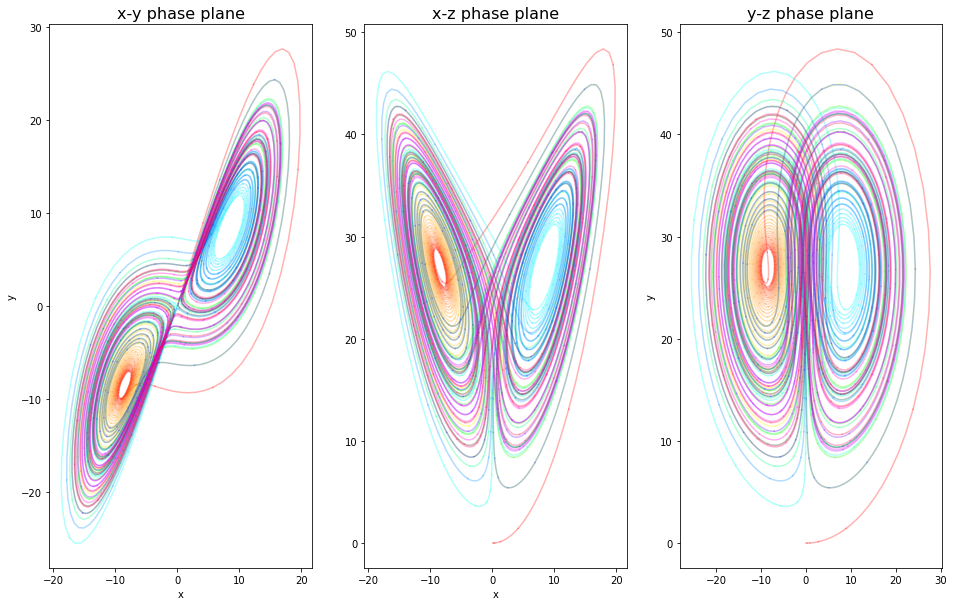

In [40]:
# now plot two-dimensional cuts of the three-dimensional phase space
fig, ax = plt.subplots(1, 3, sharex=False, sharey=False, figsize=(16, 10))

s = 10
n = 10000
for i in range(0,n-s,s):

    # plot the x values vs the y values
    ax[0].plot(x[i:i+s+1], y[i:i+s+1], color=plt.cm.hsv((i+1)/n), alpha=0.3)
    ax[0].set_title('x-y phase plane', fontsize=16)
    ax[0].set_xlabel('x')
    ax[0].set_ylabel('y')
    # plot the x values vs the z values
    ax[1].plot(x[i:i+s+1], z[i:i+s+1], color=plt.cm.hsv((i+1)/n), alpha=0.3)
    ax[1].set_title('x-z phase plane', fontsize=16)
    ax[1].set_xlabel('x')
    # plot the y values vs the z values
    ax[2].plot(y[i:i+s+1], z[i:i+s+1], color=plt.cm.hsv((i+1)/n), alpha=0.3)
    ax[2].set_title('y-z phase plane', fontsize=16)
    ax[2].set_ylabel('y')
plt.show()